# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [23]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
import copy

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

In [40]:
lenaSzum = cv2.imread('lenaRGBSzum.png')
lenaSzum = cv2.cvtColor(lenaSzum, cv2.COLOR_BGR2RGB)

lena = cv2.imread('lenaRGB.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

def medianRGB(img, window_height = 3, window_width = 3):

    result_img = copy.deepcopy(img)
    
    for x in range(window_width, len(img) + 1, 1):
        for y in range(window_height, len(img) + 1, 1):
            window = img[x - window_width : x, y - window_height : y]
            
            d = np.zeros(window.shape)
            
            for w_x in range(len(window)):
                for w_y in range(len(window[w_x])):
                    d[w_x, w_y] = np.sqrt((np.square(window - window[w_x, w_y]))).sum()
            
            idx_flat = np.argmin(d)
            idx = np.unravel_index(idx_flat, d.shape)
            
            result_img[x - window_width // 2][y - window_height // 2] = window[idx[0], idx[1]]
    
    return result_img

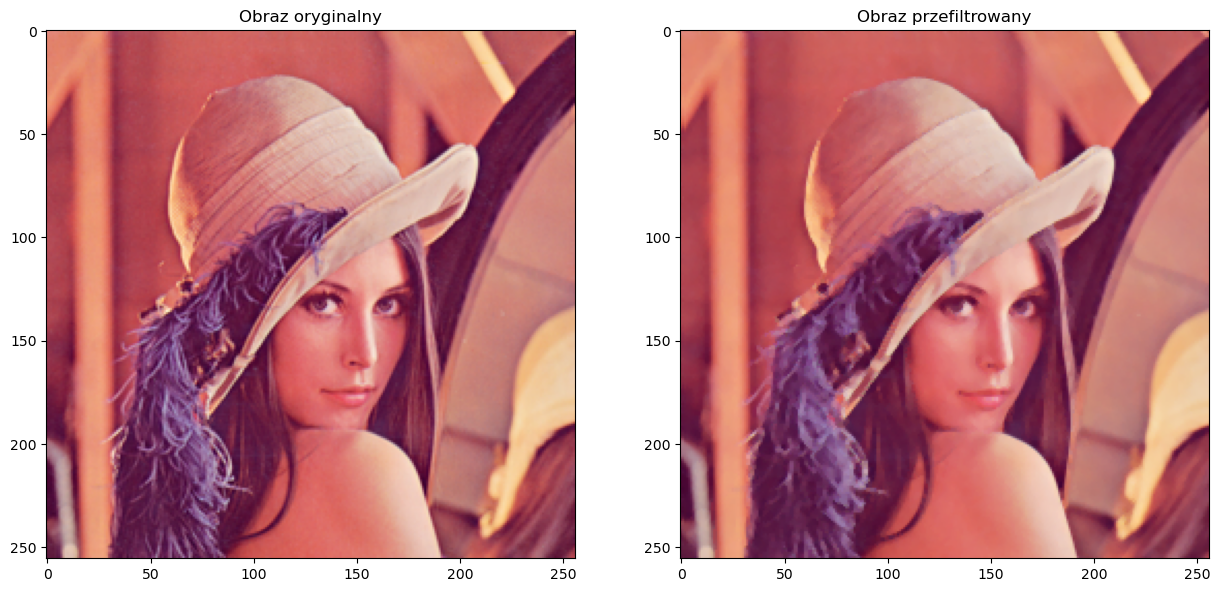

In [44]:
filtered_img = medianRGB(lena.astype('int32')).astype('int16')

fig, ax = plt.subplots(1, 2, figsize = (15, 20))
ax[0].imshow(lena)
ax[0].set_title("Obraz oryginalny")
ax[1].imshow(filtered_img)
ax[1].set_title("Obraz przefiltrowany")
plt.show()

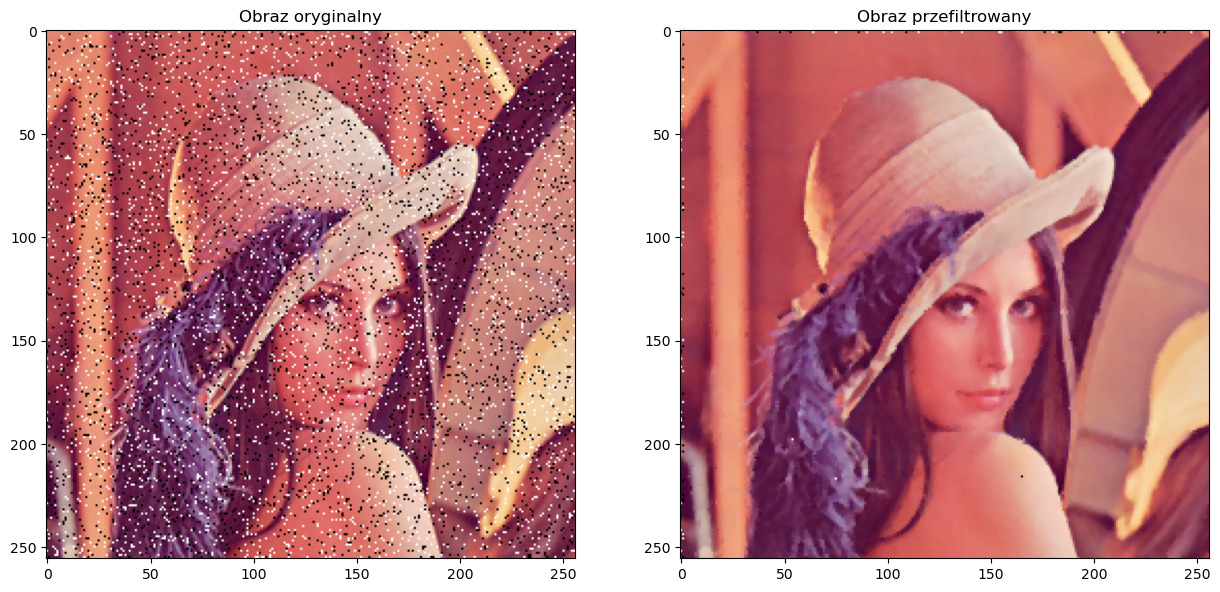

In [45]:
filtered_img2 = medianRGB(lenaSzum.astype('int32')).astype('int16')

fig, ax = plt.subplots(1, 2, figsize = (15, 20))
ax[0].imshow(lenaSzum)
ax[0].set_title("Obraz oryginalny")
ax[1].imshow(filtered_img2)
ax[1].set_title("Obraz przefiltrowany")
plt.show()